<h1><center>Machine Learning applied to Arabic Handwritten Charachters</center></h1>

\setcounter{secnumdepth}{0}


<p1><center>September 2024</center></p1>


# 1. Introduction

The task of Arabic handwritten character classification involves categorizing handwritten characters into distinct classes based on their morphology. The complexity arises due to variations in individual writing styles and the cursive nature of the Arabic script. The ability to accurately classify Arabic handwritten characters is crucial for enhancing various applications, including Arabic Optical Character Recognition (OCR) systems and digital archiving. 

In this study, two machine learning methods—Logistic Regression [1] and Support Vector Classifier (SVC) [2]—are compared using accuracy, precision, recall, and F1-score as performance metrics. Additionally, k-fold cross-validation [3] is applied to ensure robustness across different data splits. We employ Principal Component Analysis (PCA) [4] for dimensionality reduction on the Arabic Handwritten Characters Dataset (AHCD) [5] to improve the accuracy of the models.

The report is structured as follows: Section 2 outlines the problem formulation, including data types, sources, and labels. Section 3 discusses the methodology, covering the hypothesis space, preprocessing steps, dataset splitting, and feature engineering. Section 4 presents empirical results comparing the methods, while Section 5 concludes with an analysis of the results and future directions. The report will conclude with code used for this task as a appendix, which will also feature the findings. 

# 2. Problem Formulation

The AHCD dataset contains high-dimensional inputs, with each instance being a grayscale image represented as a 1x1024 feature vector, where each element corresponds to a pixel value ranging from 0 (black) to 255 (white). The dataset contains 16,800 images of handwritten Arabic characters, categorized into 28 distinct classes, representing individual letters of the Arabic alphabet.

This is a supervised learning task, where each image is associated with a label indicating the correct Arabic character. The goal of this study is to develop a machine learning model capable of accurately predicting the corresponding label for a given handwritten image. By employing dimensionality reduction techniques like PCA, we aim to extract the most significant features from the images to improve classification performance.

# 3. Methods

### 3.1 Dataset

The AHCD dataset [5] contains 16,800 grayscale images of Arabic handwritten characters, publicly available through this link. Each image is resized to 32x32 pixels and then flattened into a 1024-dimensional feature vector. The dataset is split into 75% for training, 10% for validation, and 15% for testing using the train_test_split function from scikit-learn [6].

**Training Set:** 75% of the dataset (12,600 images) is used to train the models.

**Validation Set:** 10% of the dataset (1,680 images) is reserved for tuning hyperparameters.

**Test Set:** 20% of the dataset (3,360 images) is used for final evaluation.

### 3.2 Preprocessing and Feature Engineering

Each 32x32 grayscale image is flattened into a 1x1024 feature vector. Given that processing 1024 features can be computationally expensive and redundant, Principal Component Analysis (PCA) [4] is employed to reduce the feature space from 1024 to 64 components, to retain adequate amount of the variance. This dimensionality reduction helps to focus on the most informative features, improving model performance.

### 3.3 Model

We apply the Logistic Regression model to classify the images. Logistic regression is chosen due to its simplicity, interpretability, and effectiveness in handling high-dimensional data Support Vector Classifier (SVC) for classification and compare their performance based on accuracy, precision, recall, and F1-score.

#### 3.3.1 Logistic Regression

Logistic Regression is extended to handle the multiclass nature of this task using the one-vs-all approach, where each character class is treated as a binary classification problem. The hypothesis function is:

<center>$h^{(K)}_{θ}(x) = P (y = K|x; θ^{(K)})$                                                                                                    

where $h^{(K)}(x)$ represents the probability of class $K$ for input $x$. Logistic Regression's ability to provide probabilistic predictions and its resistance to overfitting make it a suitable choice for this classification task.

Logistic Regression is a strong candidate for recognizing Arabic alphabet characters due to its effectiveness in modeling class probabilities. It establishes a weight matrix 
$θ^{K}$ that, when combined with the feature vector, generates a weight vector for each character. The predicted character corresponds to the class with the highest value in this vector.

The preference for Logistic Regression in Arabic character recognition is due to its reduced likelihood of overfitting and its ability to produce probabilistic outputs. This feature facilitates confidence assessment in predictions, which is especially important when differentiating between similar-looking characters. Moreover, its simplicity in implementation and efficient performance make it a suitable choice for this application.

#### 3.3.2 Support Vector Classifier (SVC)

The Support Vector Classifier (SVC) constructs a hyperplane that maximizes the margin between different classes. For non-linearly separable data, kernel functions are employed to project the input features into higher dimensions. The decision function is:

<center>$h(x) = sign (w * x + b)$

SVC's proficiency in handling high-dimensional data and its effectiveness in maximizing the margin between classes make it a strong candidate for handwritten character classification. In this task, the function $h(x)$ predicts the class label for the input data point $x$. It assigns a labels in the following manner: 

- $+1$ when $wx+b$ $>=$ 0, and
-  $-1$ when $< 0$


## 3.4 Loss Functions

We use categorical cross-entropy [7] for Logistic Regression and hinge loss [8] for SVC. Categorical cross-entropy minimizes the dissimilarity between predicted probabilities and true labels, while hinge loss ensures maximum separation between classes by penalizing predictions close to the decision boundary.



#### 3.4.1 Categorical Cross-Entropy Loss

Thanks to the LogisticRegression calssifier, Categorical Cross-Entropy Loss is applied automatically. This loss function is effective because it penalizes incorrect predictions, particularly when the model is confident about an incorrect class. The closer the predicted probability is to the true label, the smaller the loss. If the predicted probability of the correct class is low, the loss is large. The following is a suitable CCEL equation when dealing multi-class classification and multiple samples:

<center>$L_{\text{CE}} = -\sum_{i=1}^{N} \sum_{c=1}^{C} y_{ic} \log(p_{ic})$


**Where:**

- $N$ is the number of samples,
- $C$ is the number of classes,
- $y_{ic}$ is the binary indicator (0 or 1) if class $c$ is the correct label for sample $i$,
- $p_{ic}$ is the predicted probability that sample $i$ belongs to class $c$.


#### 3.4.2 Hinge Loss

Hinge Loss is commonly used with Support Vector Machines (SVMs) to encourage margin-maximizing hyperplanes for effective class separation. It penalizes predictions close to the decision boundary and heavily penalizes misclassifications, making it computationally efficient and robust for training SVC models. The loss function is defined as:



<center>$L(y, f(x)) = \max(0, 1 - y \cdot f(x))$


**Where:**
- $y$ is the true class label $(+1 or -1)$,
- $f(x)$ is the decision function of the classifier for a given data point $x$.

## 4. Results


#### 4.1 Performance Metrics

Our models (/methods) are evaluated using accuracy, precision, recall, and F1-score. The following is a brief explanation of each model evaluation method with their respective equations:

**Accuracy:** Measures the proportion of correct predictions.

<center>$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


**Precision:** Evaluates the accuracy of positive class predictions.
    

<center>$Precision = \frac{TP}{TP + FP}$

**Recall:** Measures the ability to identify all relevant instances.
    

<center>$Precision = \frac{TP}{TP + FN}$

    
**F1-score:** Provides a harmonic mean of precision and recall (i.e the overall "health" of the model).
    
    
<center>$F1-score = 2 * \frac{Precision * Recall}{Precision + Recall}$


**Where:**
 - $TP$: True positive,
 - $FP$: False positive,
 - $TN$: True negative,
 - $FN$: False positive.

#### 4.2 Empirical Results 

(Findings below appendix)

##### 4.2.1 Logistic Regression

The Logistic Regression model achieved an overall accuracy of 45.84% on the training set, with a corresponding error of 0.5416. On the validation set, the model reached an accuracy of 39.83%, with a higher error of 0.6017. This suggests that Logistic Regression slightly overfits the training data, as the validation accuracy is lower than the training accuracy. The model’s inability to generalize well to unseen data is further evidenced by its test set accuracy of 40.80%, resulting in a test error of 0.5920.

The difference between training, validation, and test accuracies highlights Logistic Regression’s limitations in capturing the complexity of this high-dimensional dataset, which requires more than just linear decision boundaries.



##### 4.2.2 Support Vector Classifier (SVC)

The Support Vector Classifier (SVC) demonstrated much better overall performance compared to Logistic Regression. The model achieved an accuracy of 69.17% on the training set, resulting in a training error of 0.3083. On the validation set, SVC achieved an accuracy of 54.91%, with a validation error of 0.4509, which indicates some degree of overfitting, though less pronounced than in Logistic Regression.

SVC’s performance on the test set was also higher, with an accuracy of 57.20%, resulting in a test error of 0.4280. This suggests that SVC was able to capture more complex decision boundaries, though there is still room for improvement in generalization.



##### 4.3 Summary of the results 

In comparing the training, validation, and test errors of Logistic Regression and SVC, it is clear that SVC outperformed Logistic Regression across all sets. Logistic Regression exhibited both lower training and validation accuracy, and struggled to generalize to the test data. SVC, while showing better performance overall, still experienced a drop in accuracy between the training and validation sets, indicative of some overfitting.

The training, validation, and test errors for both models can be summarized as follows:

| Model                | Training Accuracy | Validation Accuracy | Test Accuracy | Training Error | Validation Error | Test Error  |
|----------------------|-------------------|---------------------|---------------|----------------|------------------|-------------|
| Logistic Regression   | 45.84%            | 39.83%              | 40.80%        | 0.5416         | 0.6017           | 0.5920      |
| SVC                   | 69.17%            | 54.91%              | 57.20%        | 0.3083         | 0.4509           | 0.4280      |

The SVC model was selected as the final method due to its superior accuracy on both the validation and test sets, as well as its lower test error of **0.4280** compared to Logistic Regression's **0.5920**. However, further improvements can be achieved by using more advanced techniques, such as Convolutional Neural Networks (CNNs), which are well-suited for image data and could likely outperform both Logistic Regression and SVC in this task.


## 5. Conclusion

his study compared Logistic Regression and Support Vector Classifier (SVC) for a multi-class classification task. The SVC outperformed Logistic Regression, achieving a test accuracy of 57.20% compared to 40.80%. The SVC's ability to handle non-linear boundaries, made it the better choice, whereas Logistic Regression struggled with the complexity of the dataset.

However, the performance of SVC, while better, is still limited, with the model showing signs of overfitting and relatively low generalization. Neither method achieved satisfactory accuracy, suggesting that the problem remains unsolved.


To improve results further, similar tasks should focus on applying Convolutional Neural Networks (CNNs), which are better suited for image data. Data augmentation and further hyperparameter tuning could also help improve the models' generalization and performance.

In conclusion, SVC was the better model in this comparison, but exploring more advanced techniques like CNNs is recommended for better accuracy. (Examples of CNN application to the same data can be seen in the source link of the data [5])



## References


1. Raymond E Wright. Logistic regression. 1995.

2. William S Noble. What is a support vector machine? Nature biotechnology, 24(12):1565–1567, 2006.

3. Tadayoshi Fushiki. Estimation of prediction error by using k-fold cross-validation. Statistics and Computing, 21:137–146, 2011.

4. I.T. Jolliffe. Principal component analysis. Springer Verlag, New York, 1986.

5. Arabic Handwritten Characters Dataset. Kaggle, 2021. https://www.kaggle.com/datasets/mloey1/ahcd1?select=csvTrainLabel+13440x1.csvhttps://www.kaggle.com/datasets/ahmedalafeef/arabic-handwritten-characters-dataset

6. Scikit-learn Documentation. Train-test split. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

7. Categorical Cross-Entropy Loss: https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy

8. Hinge Loss for SVM: https://en.wikipedia.org/wiki/Hinge_loss

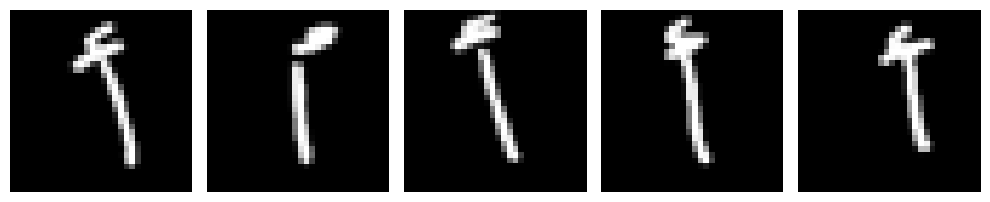


--- Logistic Regression ---
Training Set Results:
Results for Logistic Regression (Train):
Accuracy: 0.4584
Precision: 0.4623
Recall: 0.4586
F1-Score: 0.4553
              precision    recall  f1-score   support

           1       0.83      0.89      0.86       397
           2       0.47      0.63      0.53       411
           3       0.36      0.33      0.35       412
           4       0.46      0.44      0.45       414
           5       0.42      0.33      0.37       403
           6       0.38      0.33      0.35       415
           7       0.46      0.24      0.32       406
           8       0.40      0.61      0.48       404
           9       0.44      0.41      0.43       405
          10       0.48      0.61      0.54       415
          11       0.57      0.56      0.57       424
          12       0.41      0.50      0.45       393
          13       0.61      0.41      0.49       403
          14       0.47      0.42      0.45       395
          15       0.49      0

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from PIL import Image

# Loading the data
train_labels = pd.read_csv('/notebooks/ml project/csvTrainLabel 13440x1.csv', header=None)
train_images = pd.read_csv('/notebooks/ml project/csvTrainImages 13440x1024.csv', header=None)
test_labels = pd.read_csv('/notebooks/ml project/csvTestLabel 3360x1.csv', header=None)
test_images = pd.read_csv('/notebooks/ml project/csvTestImages 3360x1024.csv', header=None)

# Function to reshape images from the flattened format
def reshape_images(data, img_size=(32, 32)):
    reshaped_images = []
    for index, row in data.iterrows():
        image_array = np.array(row).reshape(img_size)
        pil_image = Image.fromarray(image_array.astype('uint8'), mode='L')
        rotated_image = pil_image.rotate(-90, expand=True)
        mirrored_image = rotated_image.transpose(Image.FLIP_LEFT_RIGHT)
        reshaped_images.append(np.array(mirrored_image).reshape(img_size))
    return np.array(reshaped_images)

# Calling the function to reshape the train and test images
reshaped_train_images = reshape_images(train_images)
reshaped_test_images = reshape_images(test_images)

# Function to display the first 5 images in a grid (after getting them rotated and mirrored)
def display_images(images, num_images=5):
    plt.figure(figsize=(10, 5))  
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)  
        plt.imshow(images[i], cmap='gray')  
        plt.axis('off') 
    plt.tight_layout()  
    plt.show()

# Displaying the first 5 reshaped images
display_images(reshaped_train_images[:5])

# Function to flatten images from the reshaped format into 1 x 1024 vectors
def flatten_images(data):
    flattened_images = [image.flatten() for image in data]
    return np.array(flattened_images)

# Calling the function to flatten the reshaped images
flattened_train_images = flatten_images(reshaped_train_images)
flattened_test_images = flatten_images(reshaped_test_images)

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(flattened_train_images, train_labels, test_size=0.15, random_state=32)

# Scale the data before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(flattened_test_images)

# Apply PCA for dimensionality reduction (64)
pca = PCA(n_components=64)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Prepare training samples
X_train_sample = X_train_pca
y_train_sample = y_train.values.ravel()

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='macro'):.4f}")
    print(classification_report(y_true, y_pred))

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sample, y_train_sample)
y_pred_logreg_train = log_reg.predict(X_train_pca)
y_pred_logreg_val = log_reg.predict(X_val_pca)

# Train Support Vector Classifier (SVC)
svc = SVC(C=1.0, kernel='rbf', gamma='scale')
svc.fit(X_train_sample, y_train_sample)
y_pred_svc_train = svc.predict(X_train_pca)
y_pred_svc_val = svc.predict(X_val_pca)

# Evaluating Logistic Regression on Training and Validation Sets
print("\n--- Logistic Regression ---")
print("Training Set Results:")
evaluate_model(y_train, y_pred_logreg_train, "Logistic Regression (Train)")
print("Validation Set Results:")
evaluate_model(y_val, y_pred_logreg_val, "Logistic Regression (Val)")

# Evaluating SVC on Training and Validation Sets
print("\n--- Support Vector Classifier (SVC) ---")
print("Training Set Results:")
evaluate_model(y_train, y_pred_svc_train, "SVC (Train)")
print("Validation Set Results:")
evaluate_model(y_val, y_pred_svc_val, "SVC (Val)")

# Adding KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=32)

# Logistic Regression Cross-Validation
logreg_cv_scores = cross_val_score(log_reg, X_train_pca, y_train_sample, cv=kf, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Accuracy Scores: ", logreg_cv_scores)
print("Logistic Regression Mean Accuracy: ", np.mean(logreg_cv_scores))

# SVC Cross-Validation
svc_cv_scores = cross_val_score(svc, X_train_pca, y_train_sample, cv=kf, scoring='accuracy')
print("\nSVC Cross-Validation Accuracy Scores: ", svc_cv_scores)
print("SVC Mean Accuracy: ", np.mean(svc_cv_scores))

# Final Test Set Evaluation for both models
y_pred_logreg_test = log_reg.predict(X_test_pca)
y_pred_svc_test = svc.predict(X_test_pca)

print("\nFinal Test Set Evaluation:")
evaluate_model(test_labels, y_pred_logreg_test, "Logistic Regression (Test)")
evaluate_model(test_labels, y_pred_svc_test, "SVC (Test)")
